<a href="https://colab.research.google.com/github/dev-preshit/ENIGMA_2.0_Tech_Wizzards/blob/main/Dataset_Perprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

True
Tesla T4
cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!kaggle datasets download cdeotte/isic2019 -p "/content/drive/MyDrive/isic2019"
!unzip "/content/drive/MyDrive/isic2019/isic2019.zip" -d "/content/drive/MyDrive/isic2019"


MessageError: Error: credential propagation was unsuccessful

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salviohexia/isic-2019-skin-lesion-images-for-classification")

print("Path to dataset files:", path)

100%|██████████| 9.10G/9.10G [01:08<00:00, 143MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salviohexia/isic-2019-skin-lesion-images-for-classification/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/salviohexia/isic-2019-skin-lesion-images-for-classification/versions/1"

# See what's inside
os.listdir(dataset_path)

['ISIC_2019_Training_Metadata.csv',
 'BKL',
 'AK',
 'ISIC_2019_Training_GroundTruth.csv',
 'MEL',
 'NV',
 'VASC',
 'BCC',
 'SCC',
 'DF']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "/root/.cache/kagglehub/datasets/salviohexia/isic-2019-skin-lesion-images-for-classification/versions/1"

# See folder structure
print(os.listdir(dataset_path))

['ISIC_2019_Training_Metadata.csv', 'BKL', 'AK', 'ISIC_2019_Training_GroundTruth.csv', 'MEL', 'NV', 'VASC', 'BCC', 'SCC', 'DF']


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "/root/.cache/kagglehub/datasets/salviohexia/isic-2019-skin-lesion-images-for-classification/versions/1"

# See folder structure
print(os.listdir(dataset_path))

['ISIC_2019_Training_Metadata.csv', 'BKL', 'AK', 'ISIC_2019_Training_GroundTruth.csv', 'MEL', 'NV', 'VASC', 'BCC', 'SCC', 'DF']


Total images found: 25331


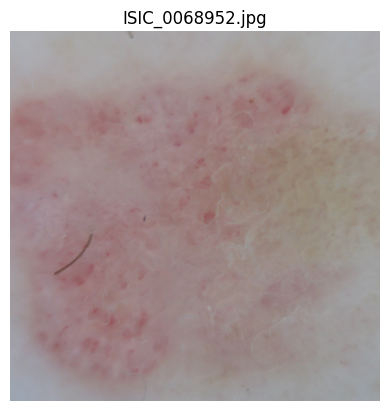

In [ ]:
# Find and show a random image
import glob

images = glob.glob(dataset_path + "/**/*.jpg", recursive=True)
print(f"Total images found: {len(images)}")

# Show first image
img = Image.open(images[0])
plt.imshow(img)
plt.title(images[0].split("/")[-1])
plt.axis("off")
plt.show()

In [ ]:
print(os.listdir(dataset_path))


['ISIC_2019_Training_Metadata.csv', 'BKL', 'AK', 'ISIC_2019_Training_GroundTruth.csv', 'MEL', 'NV', 'VASC', 'BCC', 'SCC', 'DF']
